In [1]:
import numpy as np
from scipy import optimize

In [2]:
# Let's define the function and try to find the 
# x at which the function has a local minimum

def f(x):
    return x**2 + 10 * np.sin(x)

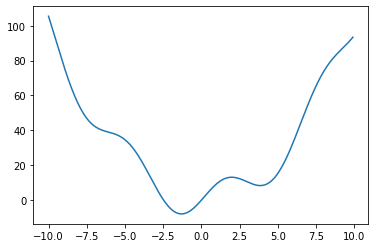

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

Let's find the minimum by using optimize.minimize

An important thing to note is the starting point at which
the method starts to look for the minimum.

In [4]:
result = optimize.minimize(f, x0=0)
print(f"{result}")

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])


There are different methods in finding the minimum of a function. Each has it's strong suits, depending on the **type** of the function.

Since this function is a smooth function, we can use a **different** method. The method is provided to the optimize.minimize as ``method`` keyword argument

In [5]:
result = optimize.minimize(f, x0=0, method="L-BFGS-B")
print(f"{result}")

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.59872117e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644015])


If we check the output created by the minimize function and focus on the ``nfew``, which shows us how many function calls the ``optimize.minimize``  called before converging towards the result.

In this case the method ``L-BFGS-B`` required **less** function calls than the default method.

A possible issue when searching for ``GLOBAL`` minimum is that the methods find the local minimum and cannot escape from it.

Example:

In [6]:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")
print(f"Local minimum result {res.x[0]}.")

Local minimum result 3.8374670868890486.


In case we do not know the neighborhood of the global minimum to chose the initial point, we need to use complex methods.

To find the global minimum we use ``optimize.basinhopping``. It combines a local optimizer with sampling of starting points:

In [7]:
global_min = optimize.basinhopping(f, 0.0)

To find roots of the function, where the function value is zero we can use ``optimize.root``

In [8]:
root = optimize.root(f, x0=1) # x0 is our initial guess
print(root)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])


To find other roots we change our initial guess, so that the method converges to the other toot.

In [9]:
root2 = optimize.root(f, x0=-2.5)
print(root2.x)

[-2.47948183]


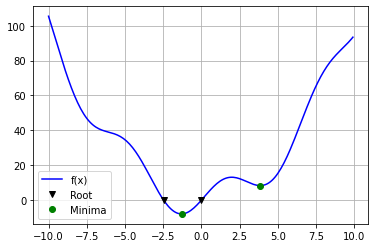

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.plot(x, f(x), 'b-',label='f(x)')

roots = np.array([root.x[0], root2.x[0]])
plt.plot(roots, f(roots), 'kv', label='Root')

minimas = np.array([res.x[0], global_min.x[0]])
plt.plot(minimas, f(minimas), 'go', label='Minima')
plt.grid()
plt.legend()